In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(
    columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [3]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [ ]:
#5차원 -> 1차원 차원축소
#5차원 데이터를 고유값이 가장 큰 고유벡터를 찾고, 데이터를 정사영

#PCA를 수행하기 위해서는 사전에 표준화가 되어 있어야 함

In [5]:
data=df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
data
target=df[['body_shape']]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
data_std=StandardScaler().fit_transform(data)

In [8]:
data_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [ ]:
#공분산행렬 :요소값
#              칼로리 아침 점심 저녁 운동시간
# 칼로리                                
# 아침  
# 점심
# 저녁
# 운동시간

#data_std에서
#칼로리 벡터(1번째 열)와 아침 벡터(2번째 열)의 공분산 값 출력

In [10]:
import numpy as np

In [11]:
data_std[:,0] #칼로리 벡터
data_std[:,1] #아침 벡터
np.cov(data_std[:,0], data_std[:,1]) # 0.88379717

array([[1.11111111, 0.88379717],
       [0.88379717, 1.11111111]])

In [14]:
#10*5 -> 5*10
data_std.T[0] #칼로리
data_std.T[1] #아침
np.cov(data_std.T[0], data_std.T[1])

array([[1.11111111, 0.88379717],
       [0.88379717, 1.11111111]])

In [ ]:
np.mean((data_std[:, 0] - np.mean(data_std[:, 0])) * (data_std[:, 1] - np.mean(data_std[:, 1])))


0.795417455141488

In [ ]:
ds=data_std.T

In [ ]:
cov_mat=np.cov(ds)

In [ ]:
cov_mat

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [ ]:
#공분산 행렬의 고유값과 고유벡터

In [ ]:
eig_vals, eig_vecs=np.linalg.eig(cov_mat)

In [ ]:
eig_vecs # 고유벡터

array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [ ]:
# pc1 = [-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985]
#pc1 벡터

print(eig_vals) #고유값
# eig_vals[0] #pc1벡터의 고유값

# #전체 데이터의 73%정보를 첫번째 고유벡터가 담을 수 있다
# #5차원 -> pc1 축으로 정사영 시키면 73% 정보가 담긴다. 27% 정보는 손실
# eig_vals[0]/sum(eig_vals)

[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [ ]:
# [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
# 4.0657343 : 첫번째(pc1축) 고유벡터의 고유값
# 0.8387565 : 두번째(pc2축)    
#     ...
# 0.2971837 : 다섯번째(pc5축) 고유벡터의 고유값


In [ ]:
#5차원 데이터를 고유벡터로 정사영

In [ ]:
data_std #(10,5)

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [ ]:
eig_vecs #(5,5)
#-0.508005  -0.44660335 -0.38377913 -0.42845209  0.46002038


array([[-0.508005  , -0.0169937 , -0.84711404,  0.11637853,  0.10244985],
       [-0.44660335, -0.36890361,  0.12808055, -0.63112016, -0.49973822],
       [-0.38377913,  0.70804084,  0.20681005, -0.40305226,  0.38232213],
       [-0.42845209, -0.53194699,  0.3694462 ,  0.22228235,  0.58954327],
       [ 0.46002038, -0.2816592 , -0.29450345, -0.61341895,  0.49601841]])

In [ ]:
eig_vecs.T

array([[-0.508005  , -0.44660335, -0.38377913, -0.42845209,  0.46002038],
       [-0.0169937 , -0.36890361,  0.70804084, -0.53194699, -0.2816592 ],
       [-0.84711404,  0.12808055,  0.20681005,  0.3694462 , -0.29450345],
       [ 0.11637853, -0.63112016, -0.40305226,  0.22228235, -0.61341895],
       [ 0.10244985, -0.49973822,  0.38232213,  0.58954327,  0.49601841]])

In [ ]:
eig_vecs.T[0] # 첫번째 고유벡터 축

array([-0.508005  , -0.44660335, -0.38377913, -0.42845209,  0.46002038])

In [ ]:
data_std #5차원 데이터 (10,5)를 eig_vecs.T[0] 축으로 정사영 하자
px=data_std.dot(eig_vecs.T[0])/np.linalg.norm(eig_vecs.T[0])

In [ ]:
res=pd.DataFrame(px,columns=['PC1'])

In [ ]:
res['y']=0

In [ ]:
res
res['label']=target
res

,PC1,y,label
0,2.226009,0,Skinny
1,0.018143,0,Normal
2,-1.762966,0,Fat
3,2.735424,0,Skinny
4,-3.027115,0,Fat
5,2.147026,0,Skinny
6,0.371425,0,Normal
7,-2.592399,0,Fat
8,0.393478,0,Normal
9,-0.509025,0,Fat


C:\Users\campusseven05\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


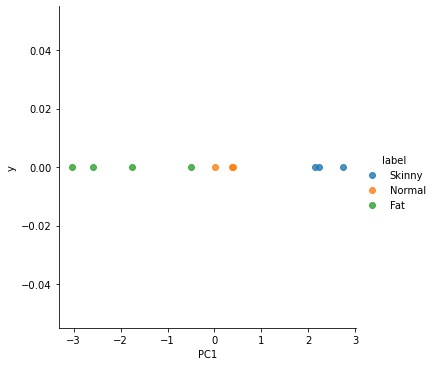

In [ ]:
import seaborn as sns
sns.lmplot('PC1', 'y', data=res, hue='label', fit_reg=False)

In [ ]:
from sklearn import decomposition

In [ ]:
pca=decomposition.PCA(n_components=3)

In [ ]:
pds=pca.fit_transform(data_std)

In [ ]:
pds

array([[-2.22600943e+00, -5.49365143e-01,  9.26748204e-01],
       [-1.81431977e-02, -2.38718978e-01,  1.73685178e-03],
       [ 1.76296611e+00,  3.68686811e-01,  6.42992171e-01],
       [-2.73542407e+00,  4.54498302e-01, -6.70516979e-01],
       [ 3.02711544e+00, -4.13050565e-01, -3.30717058e-01],
       [-2.14702579e+00, -8.34491113e-01, -5.69382701e-01],
       [-3.71424735e-01, -1.05380594e+00,  4.22756474e-01],
       [ 2.59239883e+00, -3.98508496e-01, -2.43047350e-01],
       [-3.93478147e-01,  2.09420397e+00,  2.73781041e-01],
       [ 5.09024983e-01,  5.70551157e-01, -4.54350653e-01]])